**Задание-2** Фильтрация звука.

В этой части работы мы применим то же самое Фурье-преобразование, чтобы убрать шумы с аудио дорожки.

In [148]:
import wave
import matplotlib.pyplot as plt
import numpy as np

In [149]:
# read .wav and extract the sound wave
def create_soundwave(path):
    raw = wave.open(path)
    signal = raw.readframes(-1) 
    signal = np.frombuffer(signal, dtype ="int16") 
    
    f_rate = raw.getframerate() 
    time = np.linspace( 0, len(signal) / f_rate, num = len(signal)) 
    return f_rate, signal, time # frequency, soundwave & it's timeline

In [150]:
PATH = "/home/den/ITMO/fourier_series_labs/Lab3/images/MUHA.wav"
f_rate, signal, t = create_soundwave(PATH)

In [151]:
def draw_signal(t, signal_t, label):
    fig, ax = plt.subplots()
    plt.ylabel("signal")
    plt.xlabel('Time')
    plt.title(label)
    ax.plot(t, signal_t)


def draw_fft(fourier_image, label):
    fig, ax = plt.subplots()
    ax.plot(np.abs(fourier_image))
    plt.xlabel('Frequencies (Hz)')
    plt.ylabel('Magnitude of frequencies')
    plt.title(label)

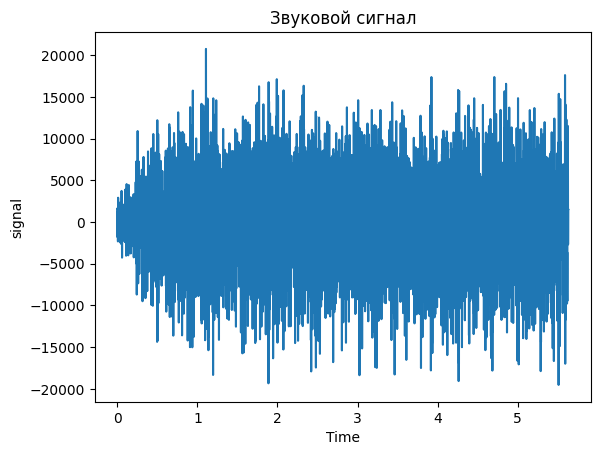

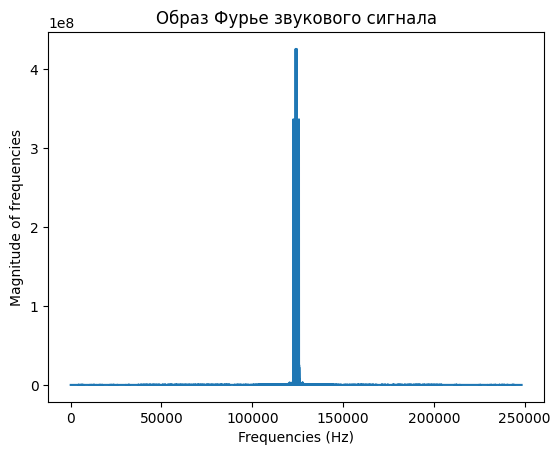

In [152]:
# caclulate Fourier image of the signal and plot it
signal_fourier_im = np.fft.fftshift(np.fft.fft(signal))
draw_signal(t, signal, 'Звуковой сигнал')
draw_fft(signal_fourier_im, 'Образ Фурье звукового сигнала')

Если судить по распределению частот, лучше всего будет использовать именно фильтр, который срежет лишь толоько верхние частоты.

Поехали!

In [153]:
# Filtering high frequencies for avoiding noises
def high_freq_filtration(fourier_image, treshold1):
    n = fourier_image.shape[0]
    frequencies_range = np.linspace(-n/2, n/2, n)
    counter = 0
    for k in frequencies_range:
        if (abs(k) >= treshold1):
            fourier_image[counter] = 0
        counter += 1
    return fourier_image

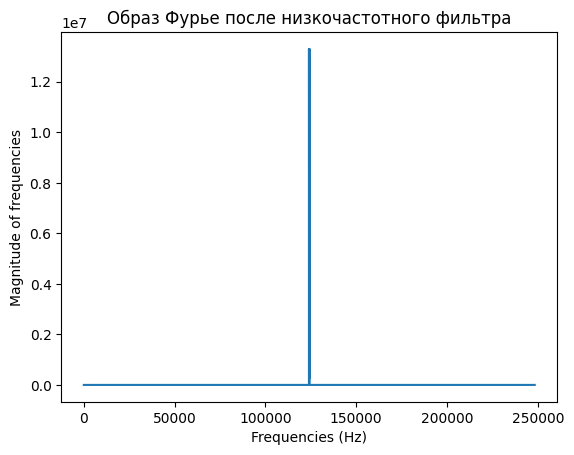

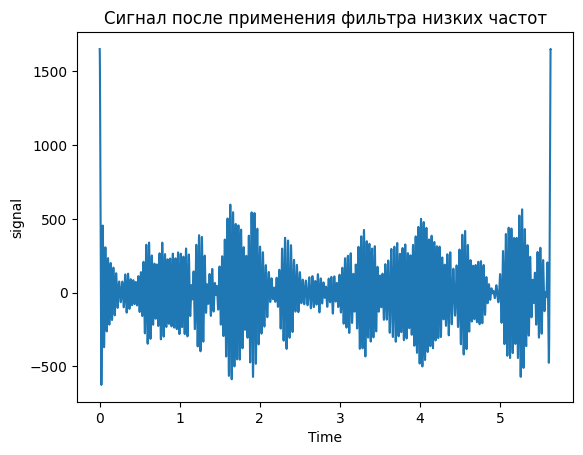

In [154]:
# FIltering process itself 
high_freqs_removed_f = high_freq_filtration(signal_fourier_im, 175) #frequencies of the filtered sound wave
high_filtered_s = np.fft.ifft(np.fft.ifftshift(high_freqs_removed_f)) #filtered soundwave calculation
draw_fft(high_freqs_removed_f, "Образ Фурье после применения фильтра")
draw_signal(t, high_filtered_s, 'Сигнал после применения фильтра')
None

**Вывод**

Заметно, что шумы в результате наложения фильтра ушли и остался только чистый, нормальный звук, что не может не радовать)